#

## Analysing Sensors Reading data (temperature, light, humidity every 5 minutes) for 8 locations

Dataset source: https://data.melbourne.vic.gov.au/explore/dataset/sensor-readings-with-temperature-light-humidity-every-5-minutes-at-8-locations-t/table/

1. I have loaded the dataset [Sensor readings, with temperature, light, humidity every 5 minutes at 8 locations (trial, 2014 to 2015)](https://data.melbourne.vic.gov.au/explore/dataset/sensor-readings-with-temperature-light-humidity-every-5-minutes-at-8-locations-t/information/) into a Python Pandas dataframe and for each place of measurement and each type of data (temp, light, humidity) calculated and printed:
  - Median 
  - Standard Deviation 
2. Visualized each time series for respective places in the same figure. Updated x-axis to have a correct time index indicated in the figure.

In [1]:
# activate pandas package
import pandas as pd

Read in the CVS file into pandas DataFrame object with `read_cvs()`

In [2]:
import pandas as pd

url = "https://data.melbourne.vic.gov.au/api/explore/v2.1/catalog/datasets/sensor-readings-with-temperature-light-humidity-every-5-minutes-at-8-locations-t/exports/csv?limit=-1"

df = pd.read_csv(url, sep=";", parse_dates=["timestamp"])

df = df.set_index("timestamp").sort_index()

In [3]:
df.head()

,mac,boardtype,boardid,temp_max,temp_min,temp_avg,light_max,light_min,light_avg,humidity_min,humidity_max,humidity_avg,model,latitude,longitude,elevation,location,rowid,position,geolocation
timestamp,,,,,,,,,,,,,,,,,,,,
2014-12-15 01:40:00+00:00,0013a20040b4b755,1,508,21.6,21.6,21.6,96.4,96.4,96.4,41.2,41.2,41.2,ENV,-37.813408,144.979492,30.10,Fitzroy Gardens,508-20141215014000,NaN,"-37.8134078, 144.9794923"
2014-12-15 01:40:00+00:00,0013a20040b516ed,1,505,23.2,23.2,23.2,93.5,93.5,93.5,48.3,48.3,48.3,ENV,-37.813073,144.980406,29.91,Fitzroy Gardens,505-20141215014000,NaN,"-37.813073, 144.9804061"
2014-12-15 01:45:00+00:00,0013a20040b315ec,1,501,22.9,22.9,22.9,97.4,97.4,97.4,43.1,43.1,43.1,ENV,-37.814808,144.980999,29.96,Fitzroy Gardens,501-20141215014500,NaN,"-37.8148084, 144.980999"
2014-12-15 01:45:00+00:00,0013a20040b516f6,1,507,21.6,21.6,21.6,97.2,97.2,97.2,44.8,44.8,44.8,ENV,-37.814922,144.982258,38.79,Fitzroy Gardens,507-20141215014500,NaN,"-37.8149218, 144.9822582"
2014-12-15 01:45:00+00:00,0013a20040b5b318,1,502,21.3,21.3,21.3,97.4,97.4,97.4,45.3,45.3,45.3,ENV,-37.814610,144.979018,22.57,Fitzroy Gardens,502-20141215014500,NaN,"-37.8146097, 144.9790177"


In [4]:
df.tail()

,mac,boardtype,boardid,temp_max,temp_min,temp_avg,light_max,light_min,light_avg,humidity_min,humidity_max,humidity_avg,model,latitude,longitude,elevation,location,rowid,position,geolocation
timestamp,,,,,,,,,,,,,,,,,,,,
2015-06-05 03:55:00+00:00,0013a20040b31583,1,509,8.1,8.1,8.1,2.6,2.6,2.6,63.4,63.4,63.4,ENV,-37.819904,144.940485,0.03,Docklands Library,509-20150605035500,NaN,"-37.8199043, 144.9404851"
2015-06-05 04:05:00+00:00,0013a20040b31571,1,510,7.4,7.4,7.4,3.9,3.9,3.9,54.4,54.4,54.4,ENV,-37.819712,144.941325,2.74,Docklands Library,510-20150605040500,NaN,"-37.8197121, 144.9413253"
2015-06-05 04:05:00+00:00,0013a20040b31583,1,509,8.1,8.1,8.1,2.6,2.6,2.6,63.9,63.9,63.9,ENV,-37.819904,144.940485,0.03,Docklands Library,509-20150605040500,NaN,"-37.8199043, 144.9404851"
2015-06-05 04:15:00+00:00,0013a20040b3155c,1,506,8.1,8.1,8.1,8.4,8.4,8.4,55.4,55.4,55.4,ENV,-37.820354,144.940482,0.71,Docklands Library,506-20150605041500,NaN,"-37.8203537, 144.9404816"
2015-06-05 04:15:00+00:00,0013a20040b31583,1,509,8.1,8.1,8.1,2.6,2.6,2.6,63.7,63.7,63.7,ENV,-37.819904,144.940485,0.03,Docklands Library,509-20150605041500,NaN,"-37.8199043, 144.9404851"


In [5]:
#checking data types and null values
df.info(verbose=True, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 56570 entries, 2014-12-15 01:40:00+00:00 to 2015-06-05 04:15:00+00:00
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mac           56570 non-null  object 
 1   boardtype     56570 non-null  int64  
 2   boardid       56570 non-null  int64  
 3   temp_max      56570 non-null  float64
 4   temp_min      56570 non-null  float64
 5   temp_avg      56570 non-null  float64
 6   light_max     56570 non-null  float64
 7   light_min     56570 non-null  float64
 8   light_avg     56570 non-null  float64
 9   humidity_min  56570 non-null  float64
 10  humidity_max  56570 non-null  float64
 11  humidity_avg  56570 non-null  float64
 12  model         56570 non-null  object 
 13  latitude      56570 non-null  float64
 14  longitude     56570 non-null  float64
 15  elevation     34975 non-null  float64
 16  location      56570 non-null  object 
 17  rowid         56570 no

In [6]:
# dropping off useless columns
df.drop(columns=['mac', 'boardtype', 'elevation', 'position', 'model', 'rowid'], inplace=True)
df.head(3)

,boardid,temp_max,temp_min,temp_avg,light_max,light_min,light_avg,humidity_min,humidity_max,humidity_avg,latitude,longitude,location,geolocation
timestamp,,,,,,,,,,,,,,
2014-12-15 01:40:00+00:00,508,21.6,21.6,21.6,96.4,96.4,96.4,41.2,41.2,41.2,-37.813408,144.979492,Fitzroy Gardens,"-37.8134078, 144.9794923"
2014-12-15 01:40:00+00:00,505,23.2,23.2,23.2,93.5,93.5,93.5,48.3,48.3,48.3,-37.813073,144.980406,Fitzroy Gardens,"-37.813073, 144.9804061"
2014-12-15 01:45:00+00:00,501,22.9,22.9,22.9,97.4,97.4,97.4,43.1,43.1,43.1,-37.814808,144.980999,Fitzroy Gardens,"-37.8148084, 144.980999"


Hmm, looks like some columns hold same values. Check if there are any rows where `temp_max`, `temp_min` and `temp_avg` are different. If there are none - drop `temp_max` and `temp_min`.

In [7]:
print(df.columns)

Index(['boardid', 'temp_max', 'temp_min', 'temp_avg', 'light_max', 'light_min',
       'light_avg', 'humidity_min', 'humidity_max', 'humidity_avg', 'latitude',
       'longitude', 'location', 'geolocation'],
      dtype='object')


In [8]:
##checking if all rows values are same of different

import pandas as pd

# Grouping the columns by measurement type
measure_groups = {
    "temperature": ['temp_max', 'temp_min', 'temp_avg'],
    "light": ['light_max', 'light_min', 'light_avg'],
    "humidity": ['humidity_min', 'humidity_max', 'humidity_avg']
}

# Dictionary to store columns to drop if redundant
columns_to_drop = []

# Checking each group
for measure, cols in measure_groups.items():
    # Keep only columns that exist in the DataFrame
    existing_cols = [c for c in cols if c in df.columns]
    
    if len(existing_cols) < 2:
        # Not enough columns to compare, skip
        continue
    
    # Check if all columns are identical row-wise
    rows_differ = df[existing_cols].nunique(axis=1) > 1
    
    if not rows_differ.any():
        # All rows are identical, drop all except last column (usually avg)
        columns_to_drop.extend(existing_cols[:-1])
        print(f"All rows identical for {measure}. Dropping {existing_cols[:-1]}.")
    else:
        print(f"{measure.capitalize()} has differences in {rows_differ.sum()} rows. Keeping all columns.")

# Droping redundant columns
df = df.drop(columns=columns_to_drop)


All rows identical for temperature. Dropping ['temp_max', 'temp_min'].
All rows identical for light. Dropping ['light_max', 'light_min'].
All rows identical for humidity. Dropping ['humidity_min', 'humidity_max'].


Try to print out the folowing information automaticaly with 5-6 lines of code ([for-loop](https://www.w3schools.com/python/python_for_loops.asp)):

`Fitzroy Gardens
	board 501 - rows 2903
	board 502 - rows 2725
	board 505 - rows 2915
	board 507 - rows 2918
	board 508 - rows 2728
Docklands Library
	board 506 - rows 6626
	board 509 - rows 19119
	board 510 - rows 12038
	board 511 - rows 4598`

In [9]:
#defining measure columns to analyse

measure_cols = [
    'temp_avg',
    'light_avg',
    'humidity_avg'
]

In [10]:
#printing above information as said

# Grouping by location and boardid and count rows
counts = df.groupby(['location', 'boardid']).size()

# Get unique locations in descending order
locations_desc = sorted(counts.index.get_level_values(0).unique(), reverse=True)

# Printing each location on a single line
for location in locations_desc:
    line = [location]  # start with location name
    for boardid, rows in counts[location].items():
        line.append(f"board {boardid} - rows {rows}")
    print("     ".join(line))



Fitzroy Gardens     board 501 - rows 2903     board 502 - rows 2725     board 505 - rows 2915     board 507 - rows 2918     board 508 - rows 2728
Docklands Library     board 506 - rows 6626     board 509 - rows 19119     board 510 - rows 12038     board 511 - rows 4598


## Median (aka expected value)

You'd like to have a function that takes an unsorted pandas.Series object (or a list) and returns a median for it.

Sort the serie: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.sort_values.html (or your list).

There are two opotions: odd and even number of elements.

If the number is odd, return an element with the index 'length of serie floor divided by 2'

If the number is even, return a half sum of two middle elements.

You can use `.iloc[]` to access the position of a row if pandas.Series object. Remember that the position is zero-based. https://stackoverflow.com/a/31593712

In [11]:
#defining median for each location for each measure

def median(serie):
    if isinstance(serie, list):
        serie = pd.Series(serie)
    sorted_serie = serie.sort_values().reset_index(drop=True)
    n = len(sorted_serie)
    if n % 2 == 1:
        return sorted_serie.iloc[n // 2]
    else:
        return (sorted_serie.iloc[n // 2 - 1] + sorted_serie.iloc[n // 2]) / 2

# Median for each place and each measure
median_per_place = df.groupby("location").median(numeric_only=True)

print(median_per_place)

                   boardid  temp_avg  light_avg  humidity_avg   latitude  \
location                                                                   
Docklands Library    509.0      17.4       13.1          51.9 -37.819904   
Fitzroy Gardens      505.0      19.0       83.9          47.7 -37.814610   

                    longitude  
location                       
Docklands Library  144.940485  
Fitzroy Gardens    144.980406  


In [12]:
# median test
ts = [pd.Series([4,3,1,2])]
ts.append(pd.Series([4,3,1,2,100]))
ts.append(pd.Series([4,3,1,2,None]))
ts.append([1,4,3,2])
for test in ts:
    if type(test) == pd.Series : 
        print(median(test), test.median())

2.5 2.5
3 3.0
3.0 2.5


In [13]:
# Data dictionary with raw values per location (not precomputed median)
data = {
    'Temperature_Avg': df.groupby('location')['temp_avg'],
    'Light_Avg': df.groupby('location')['light_avg'],
    'Humidity_Avg': df.groupby('location')['humidity_avg']
}


Implement the function `print_stats`, please.

In [14]:
# prety printing function
# you should provide function's name (median) as argument to parameter 'func'
def print_stats(func, title='', data=None):
    print(f"--- {title} ---")
    
    if data is None:
        print("No data provided")
        return
    
    for key, grouped_series in data.items():
        print(f"\n{key}:")
        # grouped_series is a GroupBy object
        for loc, values in grouped_series:
            # values is a Series for this location
            print(f"  {loc}: {func(values)}")  # pass raw Series to median



Here is the example result of the function call:

In [15]:
#printing median for each measure per location
print_stats (median, title='Medians for locations:', data=data)

--- Medians for locations: ---

Temperature_Avg:
  Docklands Library: 17.4
  Fitzroy Gardens: 19.0

Light_Avg:
  Docklands Library: 13.1
  Fitzroy Gardens: 83.9

Humidity_Avg:
  Docklands Library: 51.9
  Fitzroy Gardens: 47.7


## Standard deviation

Write a function that takes `pandas.Series` object and returns standard deviation.

First calculate `mean = serie.sum() / serie.count()`

Then make a Series object which contains `squares_off_difference` between every measured value and the `mean`.

Then return sqrt of ratio of `squares_off_difference.sum()` to number of elements in `serie` minus 1.

In [16]:
#calculcating std deviation for each measure per location 

# defining standard deviation function
def st_dev(ser):
    if isinstance(ser, list):
        ser = pd.Series(ser)
    
    n = ser.count()
    if n < 2:
        return float('nan')  # std undefined for <2 values
    
    mean = ser.sum() / n
    squared_diff = (ser - mean) ** 2
    std = (squared_diff.sum() / (n - 1)) ** 0.5  # standard deviation
    return std

# grouping data by location
grouped = df.groupby('location')

# defining measures
data = {
    'Temperature_Avg': grouped['temp_avg'],
    'Light_Avg': grouped['light_avg'],
    'Humidity_Avg': grouped['humidity_avg']
}

# pretty-print function for per-location metrics
def print_stats(func, title='', data=None):
    print(f"--- {title} ---")
    if data is None:
        print("No data provided")
        return
    
    for key, grouped_series in data.items():
        print(f"\n{key}:")
        for loc, values in grouped_series:
            print(f"  {loc}: {func(values):.2f}")


In [17]:
test = pd.Series(range(10))
print(st_dev(test));  print(test.std())

3.0276503540974917
3.0276503540974917


You can reuse your solution for median printout, now with `st_dev` function

In [18]:
#printing st deviation for each measure per location

print_stats (st_dev, title='St. dev. for locations:', data=data)

--- St. dev. for locations: ---

Temperature_Avg:
  Docklands Library: 5.67
  Fitzroy Gardens: 4.74

Light_Avg:
  Docklands Library: 43.97
  Fitzroy Gardens: 43.51

Humidity_Avg:
  Docklands Library: 11.88
  Fitzroy Gardens: 16.90


## Visualisation

In [19]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [20]:
# if you need nicer printing
# https://docs.python.org/3/library/pprint.html
import pprint
pp = pprint.PrettyPrinter(indent=4)

Have a look at https://pandas.pydata.org/pandas-docs/stable/timeseries.html

Have you noticed that column `timestamp` in our data is a string? We have to convert it to `pandas.Timestamp` to be able to plot measurements correctly.

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html

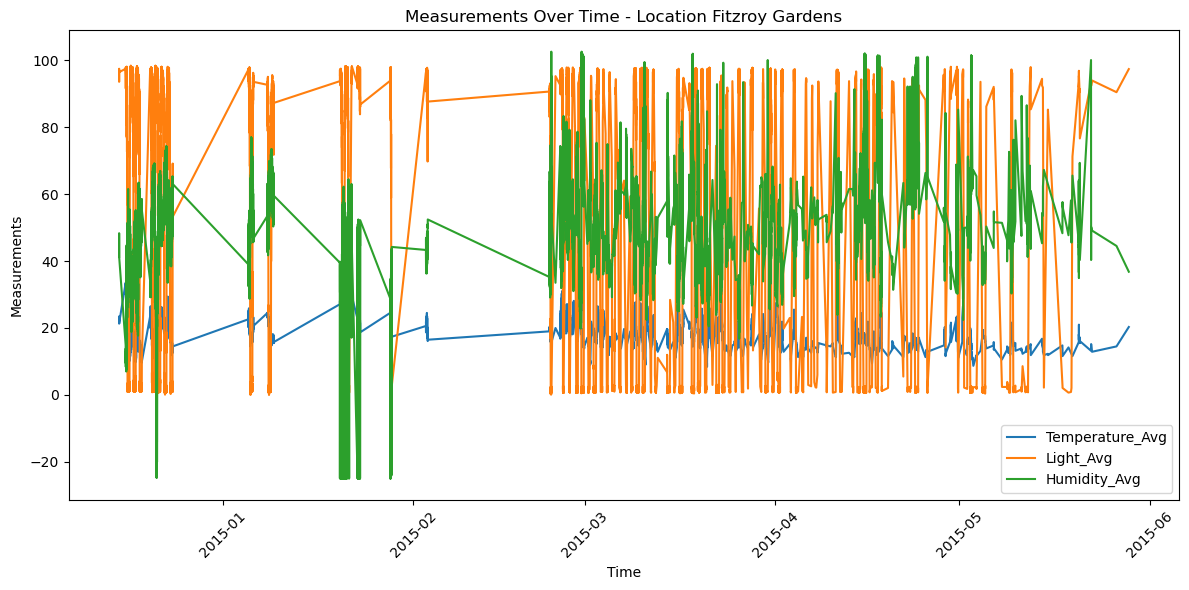

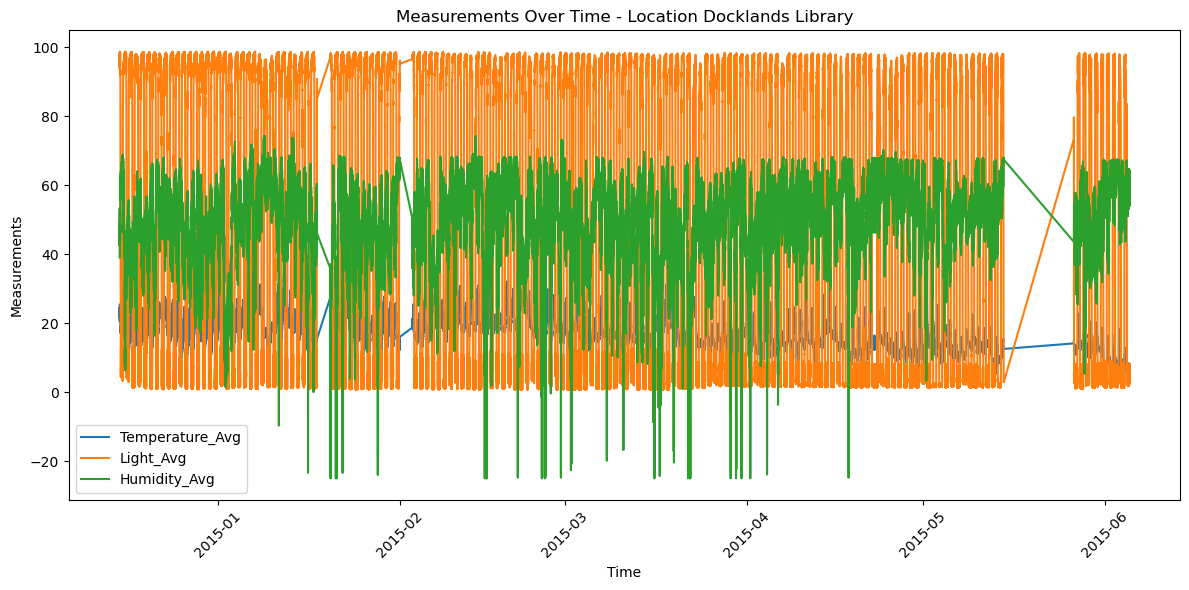

In [21]:
# DatetimeIndex is already in pandas timestamp format

#visualizing each time series for the respective places in the same figure

# getting all unique locations
locations = df['location'].unique()

for loc in locations:
    df_loc = df[df['location'] == loc]  # subset for this location
    
    plt.figure(figsize=(12, 6))
    plt.plot(df_loc.index, df_loc['temp_avg'], label='Temperature_Avg')
    plt.plot(df_loc.index, df_loc['light_avg'], label='Light_Avg')
    plt.plot(df_loc.index, df_loc['humidity_avg'], label='Humidity_Avg')
    
    plt.xlabel('Time')
    plt.ylabel('Measurements')
    plt.title(f'Measurements Over Time - Location {loc}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [22]:
# Grouping the columns by measures type
measure_groups = {
    "temperature": ['temp_max', 'temp_min', 'temp_avg'],
    "light": ['light_max', 'light_min', 'light_avg'],
    "humidity": ['humidity_min', 'humidity_max', 'humidity_avg']
}

# Dictionary to store columns to drop if redundant
columns_to_drop = []

# Checking each group
for measure, cols in measure_groups.items():
    # Keep only columns that exist in the DataFrame
    existing_cols = [c for c in cols if c in df.columns]
    
    if len(existing_cols) < 2:
        # if not enough columns to compare, skip
        continue
    
    # checking if all columns are identical row-wise
    rows_differ = df[existing_cols].nunique(axis=1) > 1
    
    if not rows_differ.any():
        # all rows are identical, drop all except last column
        columns_to_drop.extend(existing_cols[:-1])
        print(f"All rows identical for {measure}. Dropping {existing_cols[:-1]}.")
    else:
        print(f"{measure.capitalize()} has differences in {rows_differ.sum()} rows. Keeping all columns.")

# droping off redundant columns
df = df.drop(columns=columns_to_drop)


In [23]:
df.head()

,boardid,temp_avg,light_avg,humidity_avg,latitude,longitude,location,geolocation
timestamp,,,,,,,,
2014-12-15 01:40:00+00:00,508,21.6,96.4,41.2,-37.813408,144.979492,Fitzroy Gardens,"-37.8134078, 144.9794923"
2014-12-15 01:40:00+00:00,505,23.2,93.5,48.3,-37.813073,144.980406,Fitzroy Gardens,"-37.813073, 144.9804061"
2014-12-15 01:45:00+00:00,501,22.9,97.4,43.1,-37.814808,144.980999,Fitzroy Gardens,"-37.8148084, 144.980999"
2014-12-15 01:45:00+00:00,507,21.6,97.2,44.8,-37.814922,144.982258,Fitzroy Gardens,"-37.8149218, 144.9822582"
2014-12-15 01:45:00+00:00,502,21.3,97.4,45.3,-37.814610,144.979018,Fitzroy Gardens,"-37.8146097, 144.9790177"


/tmp/ipykernel_989/77113579.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(boards))


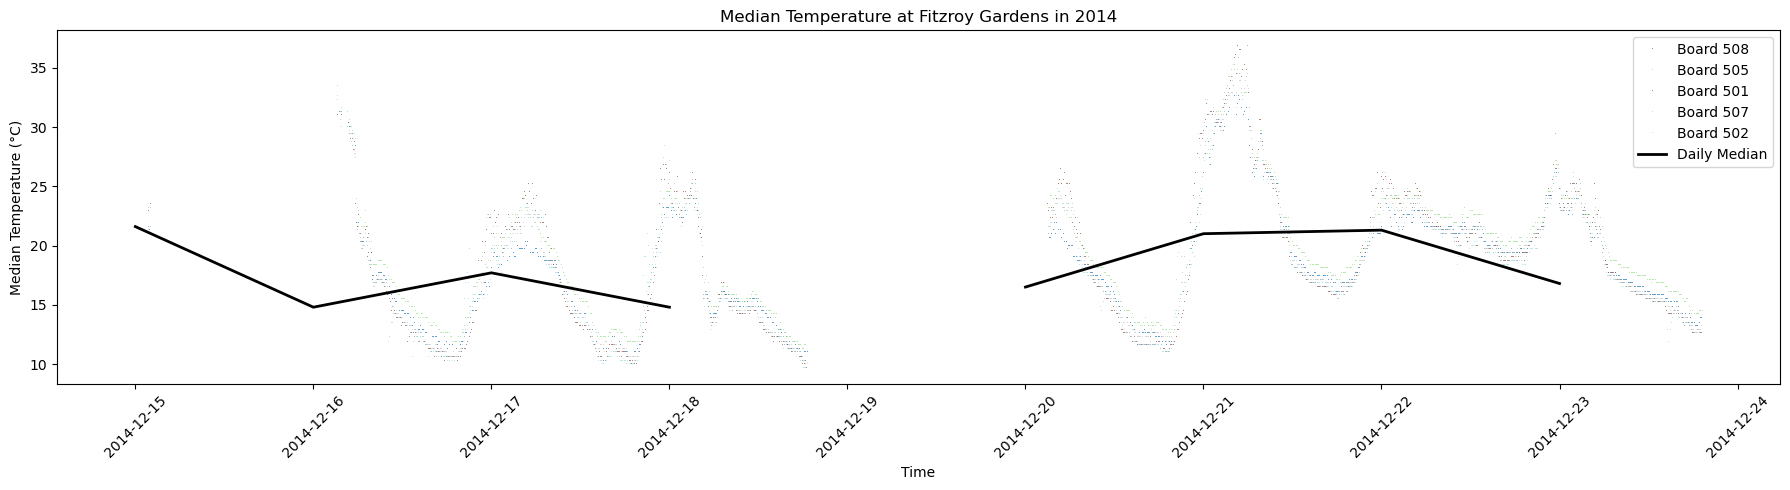

In [24]:
#plotting 
#Ensuring all columns are clean
df.columns = df.columns.str.strip()  # remove any whitespace

# defining location and time range
location = 'Fitzroy Gardens'
t_start = pd.Timestamp('2014-01-01', tz='UTC')
t_end   = pd.Timestamp('2014-12-31', tz='UTC')

# filtering by location and time
data_filtered = df[(df['location'] == location) &
                   (df.index >= t_start) &
                   (df.index <= t_end)]

# coloring each board differently
boards = data_filtered['boardid'].unique()
colors = plt.cm.get_cmap('tab20', len(boards))

plt.figure(figsize=(18,5))
for i, board in enumerate(boards):
    board_data = data_filtered[data_filtered['boardid'] == board]
    plt.plot(board_data.index, board_data['temp_avg'], ',', color=colors(i), alpha=0.7, label=f'Board {board}')

# overlaying daily median
median_series = data_filtered['temp_avg'].resample('D').median()
plt.plot(median_series.index, median_series, '-', color='k', lw=2, label='Daily Median')

# defining labels, title, legend
plt.xlabel('Time')
plt.ylabel('Median Temperature (°C)')
plt.title(f'Median Temperature at {location} in 2014')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [25]:
print(df.columns)


Index(['boardid', 'temp_avg', 'light_avg', 'humidity_avg', 'latitude',
       'longitude', 'location', 'geolocation'],
      dtype='object')


In [26]:
#checking the DataFrame index
print(type(df.index))

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [27]:
#DataFrame index is already a DatetimeIndex

Now we can use our index as timebased. Note that values are non unique and there will be a small performance penalty: https://stackoverflow.com/a/16629125 

Now we can easily plot all measurements from some location and from some period of time.

For example: average temperature at *Fitzroy Gardens* only from 2014.

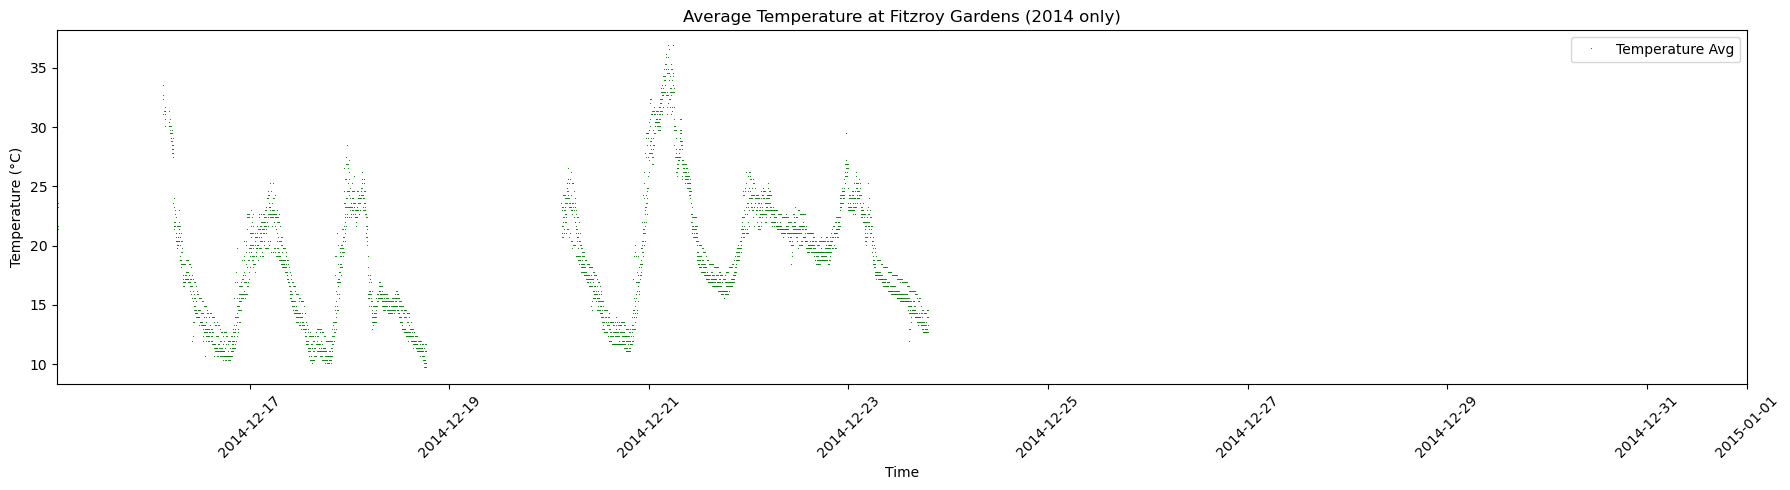

In [28]:
#Plotting Avg temperature at Fitzroy Gardens only from 2014
# model

#time range
t_min = df.index.min()
t_max = pd.Timestamp('2015-01-01', tz='UTC')

# filtering by location and time
location_filter = df['location'] == 'Fitzroy Gardens'
time_filter     = df.index < t_max
data_filtered   = df[location_filter & time_filter]

# ploting average temperature
plt.figure(figsize=(18,5))
plt.xlim(t_min, t_max)
plt.plot(data_filtered.index, data_filtered['temp_avg'], ',', c='g', alpha=0.9, label='Temperature Avg')

# Optional: overlay daily median
#daily_median = data_filtered['temp_avg'].resample('D').median()
#plt.plot(daily_median.index, daily_median, '-', color='k', lw=2, label='Daily Median')

# Adding labels, title, legend
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Average Temperature at Fitzroy Gardens (2014 only)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Can you color separate different boards?

Can your plot the median?

In [29]:
xmin, xmax = df.index.min(), pd.Timestamp('2015-12-31')
measurments = ['temp_avg', 'light_avg', 'humidity_avg']
colors = ['#d73027','#f46d43','#fdae61','#FFBF00','#aaaa9a','#82FA58','#a6d96a','#66bd63','#1a9850']

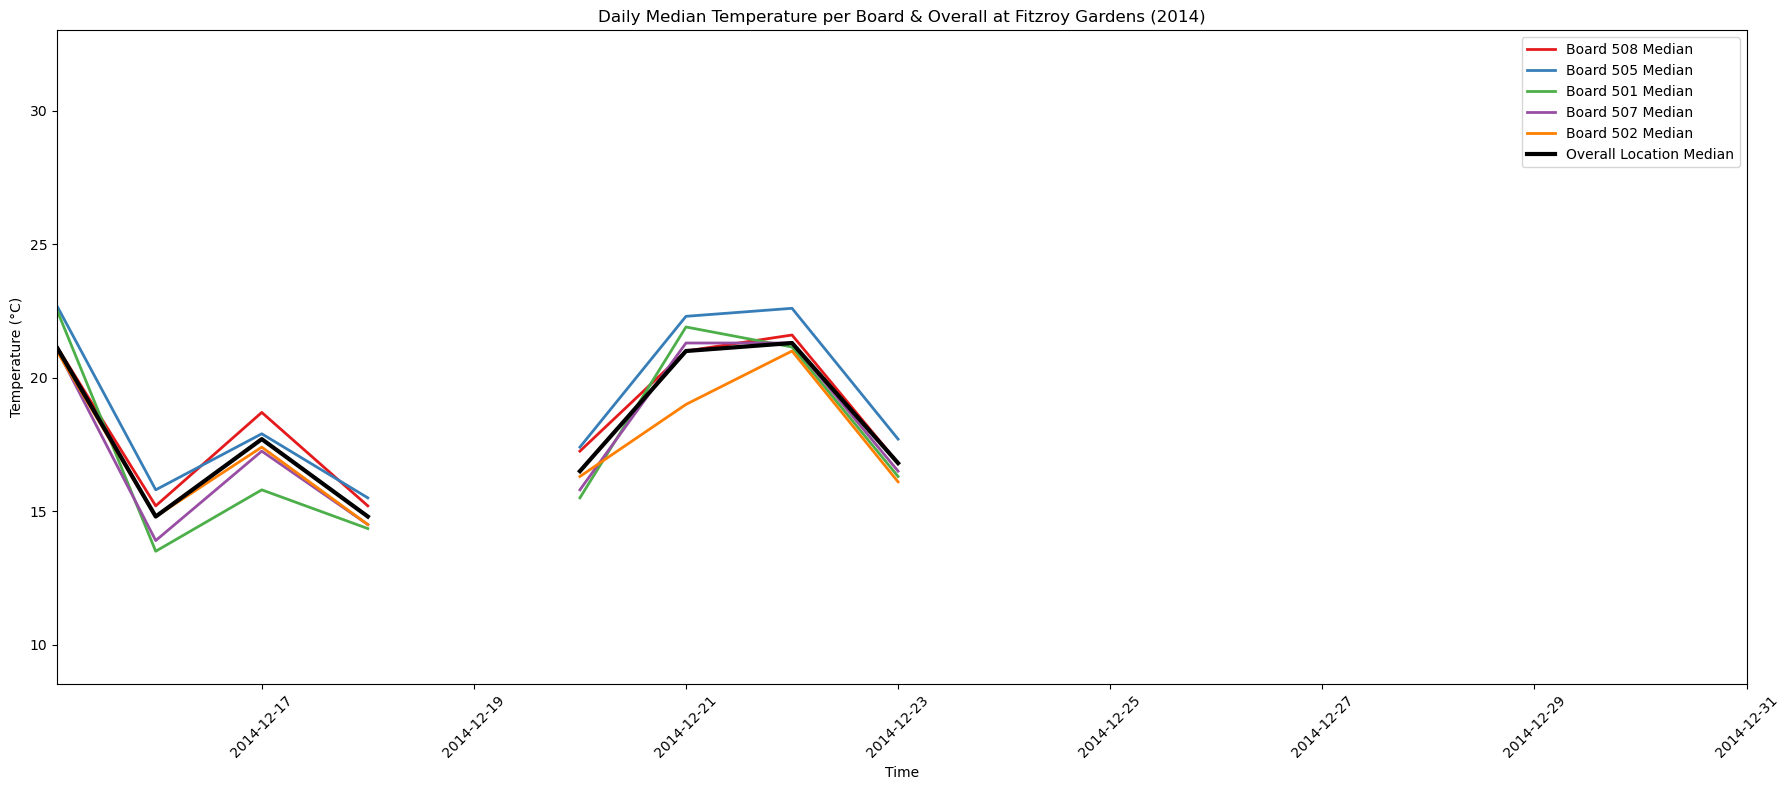

In [30]:
#Plotting median temperature for Fitzroy Gardens as lcoation during 2024 for each board
# model
# your code here

# Time limits
xmin, xmax = df.index.min(), pd.Timestamp('2014-12-31')

# Bright colors for boards
colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','#a65628','#f781bf','#999999','#66c2a5']

# Filter for specific location
location = 'Fitzroy Gardens'
data_filtered = df[df['location'] == location]

# Unique boards
boards = data_filtered['boardid'].unique()

# Create figure
plt.figure(figsize=(18,8))
plt.xlim(xmin, xmax)

# Plot each board's daily median temperature
for i, board in enumerate(boards):
    board_data = data_filtered[data_filtered['boardid'] == board]
    daily_median = board_data['temp_avg'].resample('D').median()
    color = colors[i % len(colors)]
    plt.plot(daily_median.index, daily_median, '-', color=color, lw=2, label=f'Board {board} Median')

# Plot overall daily median for the location
overall_median = data_filtered['temp_avg'].resample('D').median()
plt.plot(overall_median.index, overall_median, '-', color='k', lw=3, label='Overall Location Median')

# Labels, title, legend
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title(f'Daily Median Temperature per Board & Overall at {location} (2014)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [31]:
# helper function
# see https://matplotlib.org/api/axes_api.html
def get_sub_ax(ax, xbound=(df.index.min(), df.index.max()), ybound=(0, 100)):
    ax_i = ax.twinx(); # https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.twinx.html
    ax_i.set_ybound(ybound); # https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_ybound.html
    ax_i.set_xbound(xbound)
    ax_i.set_autoscaley_on(False); 
    ax_i.yaxis.tick_left()
    ax_i.grid(b=True, color='b', alpha=.1, axis='y') # https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.grid.html
    return ax_i

In [32]:

#checking data
print(df['location'].unique())  # check spelling
print(df.index[:5])             # check timezone
print(df[(df['location']=='Fitzroy Gardens')].head())  # should show some data

['Fitzroy Gardens' 'Docklands Library']
DatetimeIndex(['2014-12-15 01:40:00+00:00', '2014-12-15 01:40:00+00:00',
               '2014-12-15 01:45:00+00:00', '2014-12-15 01:45:00+00:00',
               '2014-12-15 01:45:00+00:00'],
              dtype='datetime64[ns, UTC]', name='timestamp', freq=None)
                           boardid  temp_avg  light_avg  humidity_avg  \
timestamp                                                               
2014-12-15 01:40:00+00:00      508      21.6       96.4          41.2   
2014-12-15 01:40:00+00:00      505      23.2       93.5          48.3   
2014-12-15 01:45:00+00:00      501      22.9       97.4          43.1   
2014-12-15 01:45:00+00:00      507      21.6       97.2          44.8   
2014-12-15 01:45:00+00:00      502      21.3       97.4          45.3   

                            latitude   longitude         location  \
timestamp                                                           
2014-12-15 01:40:00+00:00 -37.813408  144.97949

In [33]:
# automation ploting with a function

#following code would help in automating to visualize the said measures for location='Fitzroy Gardens' but 
#location can be modified to see the measure for other location

def plot_time_range(t_min_str='2014-01-01',
                    t_max_str='2014-12-31', #max date could be changed to see other period data
                    marker='.', markersize=3,
                    resample='D', location='Docklands Library', #location could be changed to other location example, 'Fitzroy Gardens',
                    measurements='None'):
    
   
    if measurements is None:
        measurements = ['temp_avg']
    
    # Bright colors
    colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00',
              '#ffff33','#a65628','#f781bf','#999999','#66c2a5']
    
    # Ensure datetime index is tz-aware
    if df.index.tz is None:
        df.index = df.index.tz_localize('UTC')
    
    t_min = pd.to_datetime(t_min_str, utc=True)
    t_max = pd.to_datetime(t_max_str, utc=True)
    
    # Clean location strings
    df['location'] = df['location'].str.strip()
    
    # Filter data
    data_filtered = df[(df['location'] == location) &
                       (df.index >= t_min) &
                       (df.index <= t_max)]
    
    if data_filtered.empty:
        print("No data in this range or location!")
        return
    
    boards = data_filtered['boardid'].unique()
    
    fig, ax = plt.subplots(figsize=(18,7))
    
    for meas in measurements:
        for i, board in enumerate(boards):
            board_data = data_filtered[data_filtered['boardid'] == board]

            #showing label for every board on the chart
            ax.plot(board_data.index, board_data[meas], marker, markersize=markersize,
        color=colors[i % len(colors)], alpha=0.7,
        label=f'{meas} Board {board}')  # label for every board
            
        
        # Overall median for location
        median_series = data_filtered[meas].resample(resample).median()
        ax.plot(median_series.index, median_series, '-', color='k', lw=2, label=f'{meas} Median')
    
    ax.set_xlabel('Time')
    ax.set_ylabel('Measurements')
    ax.set_title(f'{location} Measurements from {t_min_str} to {t_max_str}')
    ax.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()

    #display
    plt.show()


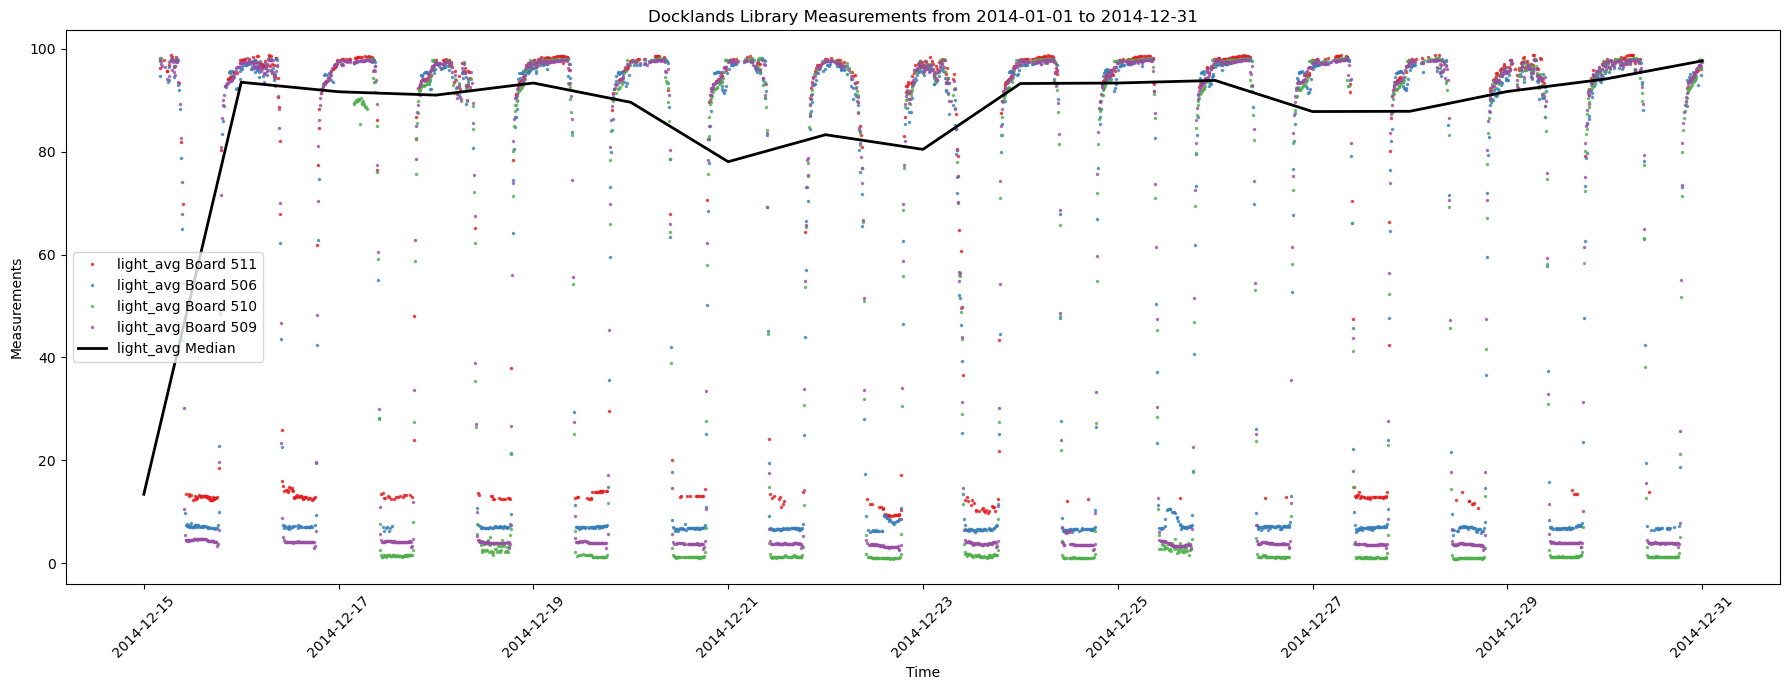

In [34]:
#above defined code helps in automatic visualization of measures of interest

plot_time_range('2014-01-01', '2014-12-31', measurements=['light_avg'])


## now we can easily plot different time ranges

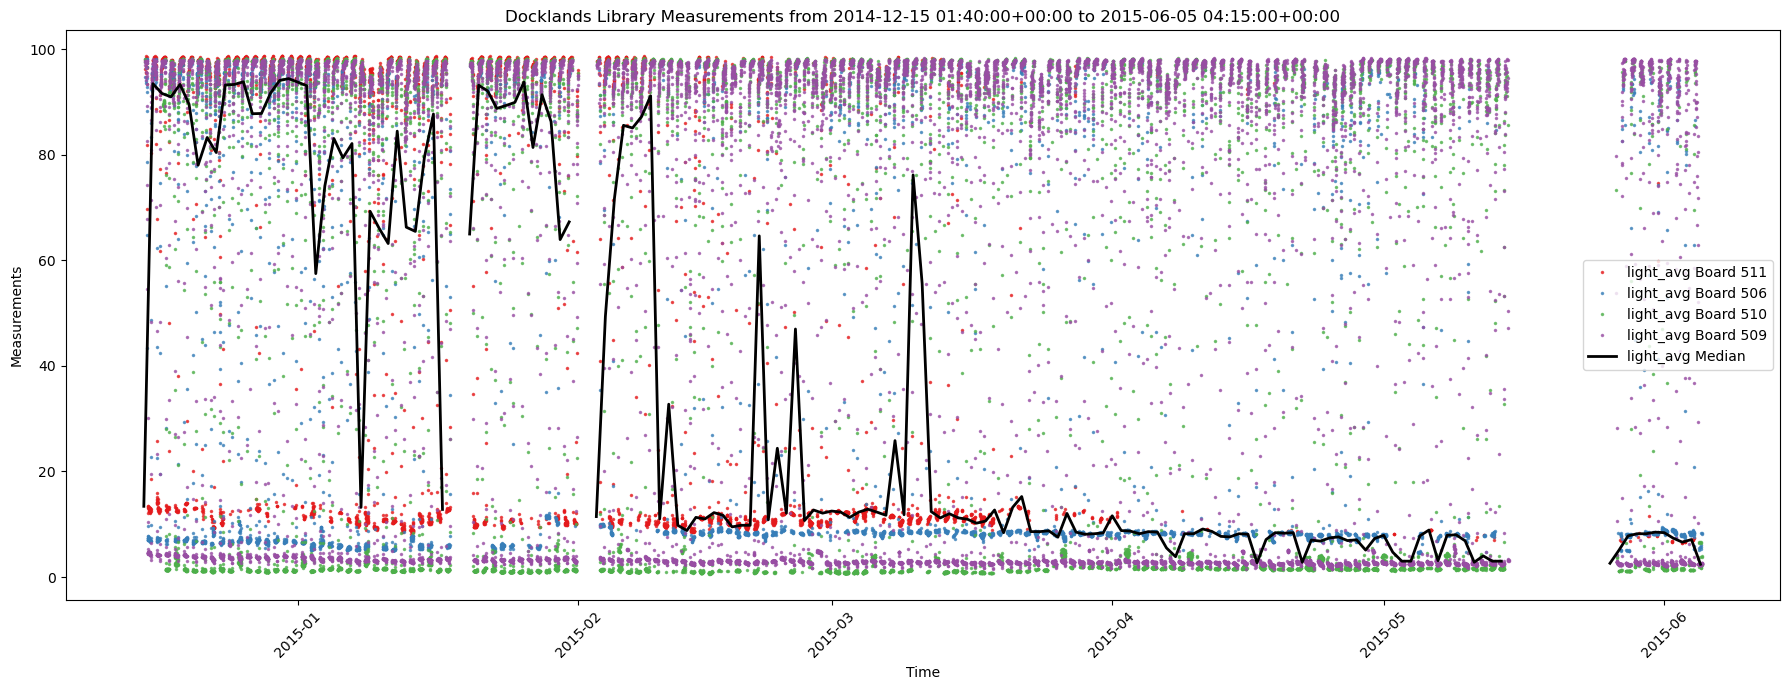

In [35]:
#example, for location as Docklands Library shows light_avg measure time ranges

plot_time_range(df.index.min(), df.index.max(), location='Docklands Library',measurements=['light_avg'])



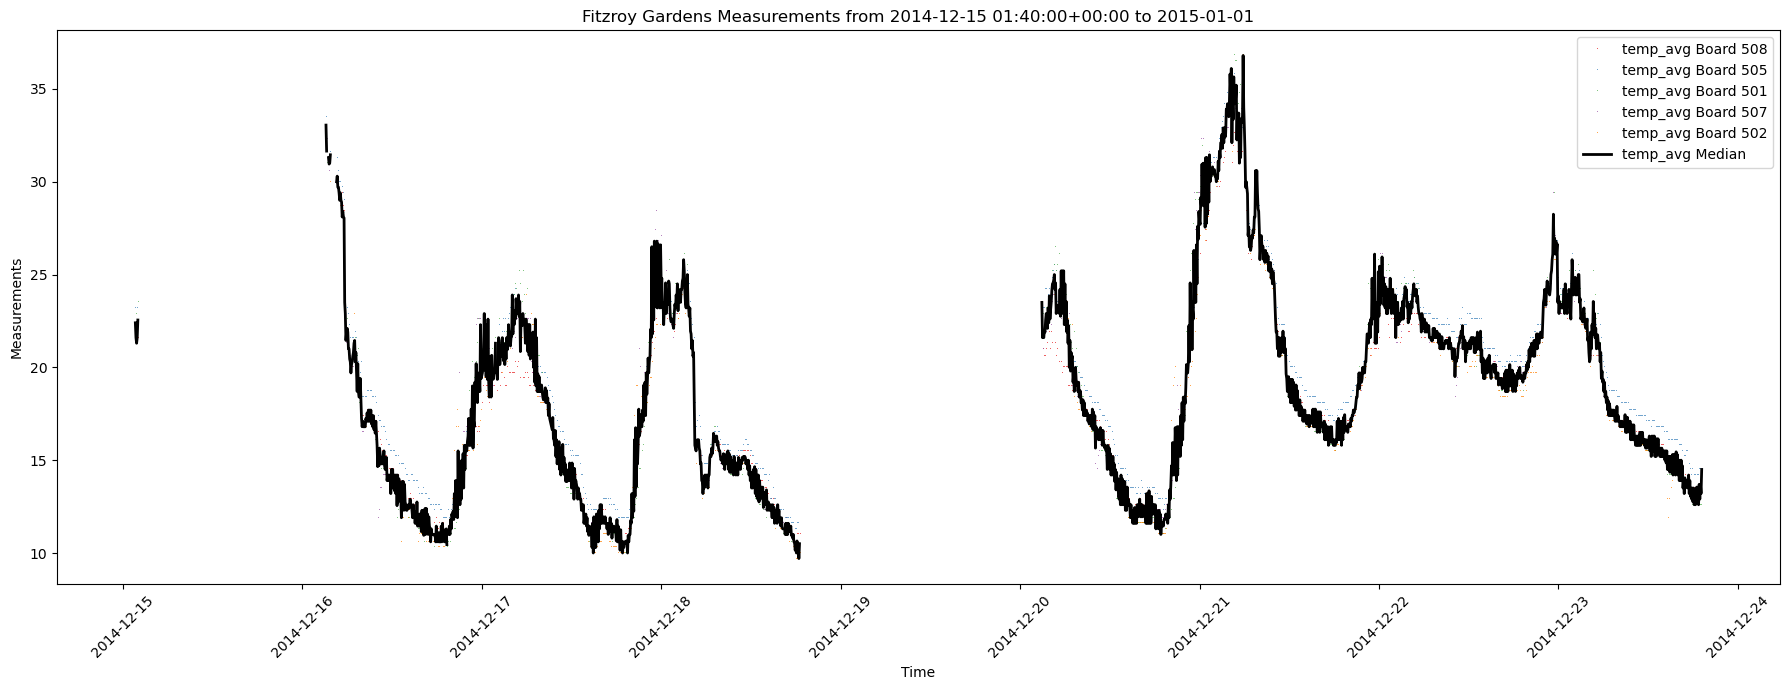

In [36]:
#plot_time_range (data.index.min(), '2015-01-01', marker=',', resample='5Min')

#example could be used to plot from the earliest timestamp for temp_avg' in df to Jan 1, 2015 for Fitzroy Gardens
plot_time_range(
    t_min_str=str(df.index.min()),
    t_max_str='2015-01-01',
    marker=',',
    resample='5Min',
    location='Fitzroy Gardens',   
    measurements=['temp_avg']    
)


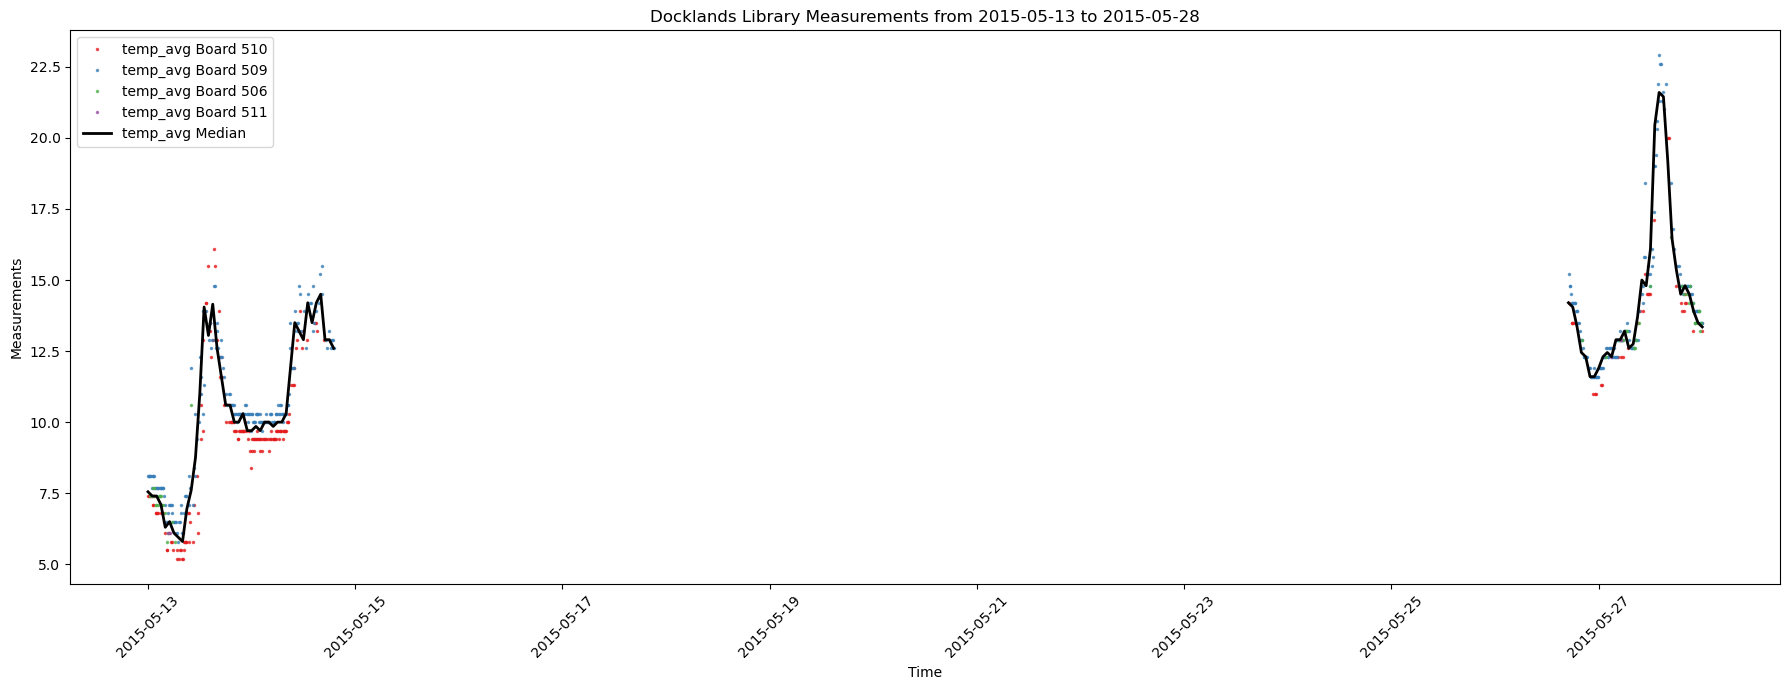

In [37]:
#plot_time_range ( '2015-05-13', '2015-05-28', marker='.', resample='H')

plot_time_range(
    t_min_str='2015-05-13',
    t_max_str='2015-05-28',
    marker='.',
    resample='h',
   # location='Fitzroy Gardens',  # None = no location filtering
    measurements=['temp_avg']
)



# Problems Encountered During the Assignment

1. Data filtering and time ranges:
At first, my plots were empty because I had mismatches between the dataset’s timezone-aware index and the time range I was passing.
Fix made: I converted all times to UTC to ensure consistent filtering.

2. Board and location separation
I struggled to make sure each board’s data plotted with its own color and label. Initially, only one label showed up in the legend.
Fix made: I modified the labeling logic to include every board explicitly.

3. KeyError and AttributeError issues
Several times I ran into errors like `KeyError: 'N'` or 'dict' object has no attribute 'index'`
Fix made: This was caused by using the wrong DataFrame reference sometimes 'data' instead of 'df' or mis-typed measurement names.

4. Statistical calculations
When calculating medians and standard deviations, I had to double-check grouping by location and measurement to avoid incorrect results. At first I calculated median & st dev for all measures not speciafic to locations then realize the assignment requirement to calculate median, st dev for measures per location.
Fix made: This was solved by  through debugging, checking the DataFrame content (df.head(), df.columns, df['location'].unique()), and carefully adjusting the plotting function.


# Steps to analyse 

1. Importing the data via api url

2. Dropped off unnecessary columns

3. Checked if all rows have similar values or not for similar measures

4. Dropped off  'temp_max', 'temp_min’, 'light_max', 'light_min’, 'humidity_min', 'humidity_max' as all rows values were identical among similar measures, instead used avg columns

5. Calculated median & standard deviation of all measure per location

6. Visualized all measures avgs per location in the same chart

7. Plotted average temperature at Fitzroy Gardens only from 2014.

8. Plotting median temperature for Fitzroy Gardens as location during 2024 for each board

9. Updated code for automation ploting with a function which helps in automatic visualization of measures of interest. Example, plotted  for location - Docklands Library which shows light_avg measure time ranges